# Mass Change
**Description:**  Ice sheet height and thickness changes from ICESat to ICECast-2.

Choose the data to plot by passing a string to `version` with the format "ais_VERSION_TYPE" where  VERSION is "dhdt" for total thickness change or "dmdt" for corrected for firn-air content. 

TYPE is "floating" or "grounded".

Optionally add "_filt" to retrieve a filtered version of the data.

**Datasets:** 

N.A.

**Associated papers:** 

Smith, B., Helen A. Fricker, Alex S. Gardner, Brooke Medley, Johan Nilsson, Fernando S. Paolo, Nicholas Holschuh, et al. “Pervasive Ice Sheet Mass Loss Reflects Competing Ocean and Atmosphere Processes.” Science, April 30, 2020, eaaz5845. https://doi.org/10.1126/science.aaz5845.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import itertools
import os

from polartoolkit import fetch, maps, regions, utils

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

In [3]:
versions = ["dhdt", "dmdt"]
types = ["floating", "grounded"]
filts = ["", "_filt"]

combos = list(itertools.product(*[versions, types, filts]))

version_names = [f"{s[0]}_{s[1]}{s[2]}" for s in combos]

grids = []
for name in version_names:
    data = fetch.mass_change(version=f"ais_{name}")
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for dhdt_floating
grid spacing: 5001.18699879 m
grid region: (-2521652.10412, 2843360.03282, -2229531.47932, 2336552.25058)
grid zmin: -9.33203697205
grid zmax: 11.7978229523
grid registration: p
##########
Info for dhdt_floating_filt
grid spacing: 5001.18699879 m
grid region: (-2521652.10412, 2843360.03282, -2229531.47932, 2336552.25058)
grid zmin: -7.43470716476
grid zmax: 10.3668851852
grid registration: p
##########
Info for dhdt_grounded
grid spacing: 5000.0 m
grid region: (-2526157.06916, 2648842.93084, -2124966.01441, 2180033.98559)
grid zmin: -27.9492435455
grid zmax: 1.03691923618
grid registration: p
##########
Info for dhdt_grounded_filt
grid spacing: 5000.0 m
grid region: (-2526157.06916, 2648842.93084, -2124966.01441, 2180033.98559)
grid zmin: -26.8693599701
grid zmax: 0.572579205036
grid registration: p
##########
Info for dmdt_floating
grid spacing: 5001.18699879 m
grid region: (-2521652.10412, 2843360.03282, -2229531.47932, 2336552.25058)
grid zmin: -9.57345867157


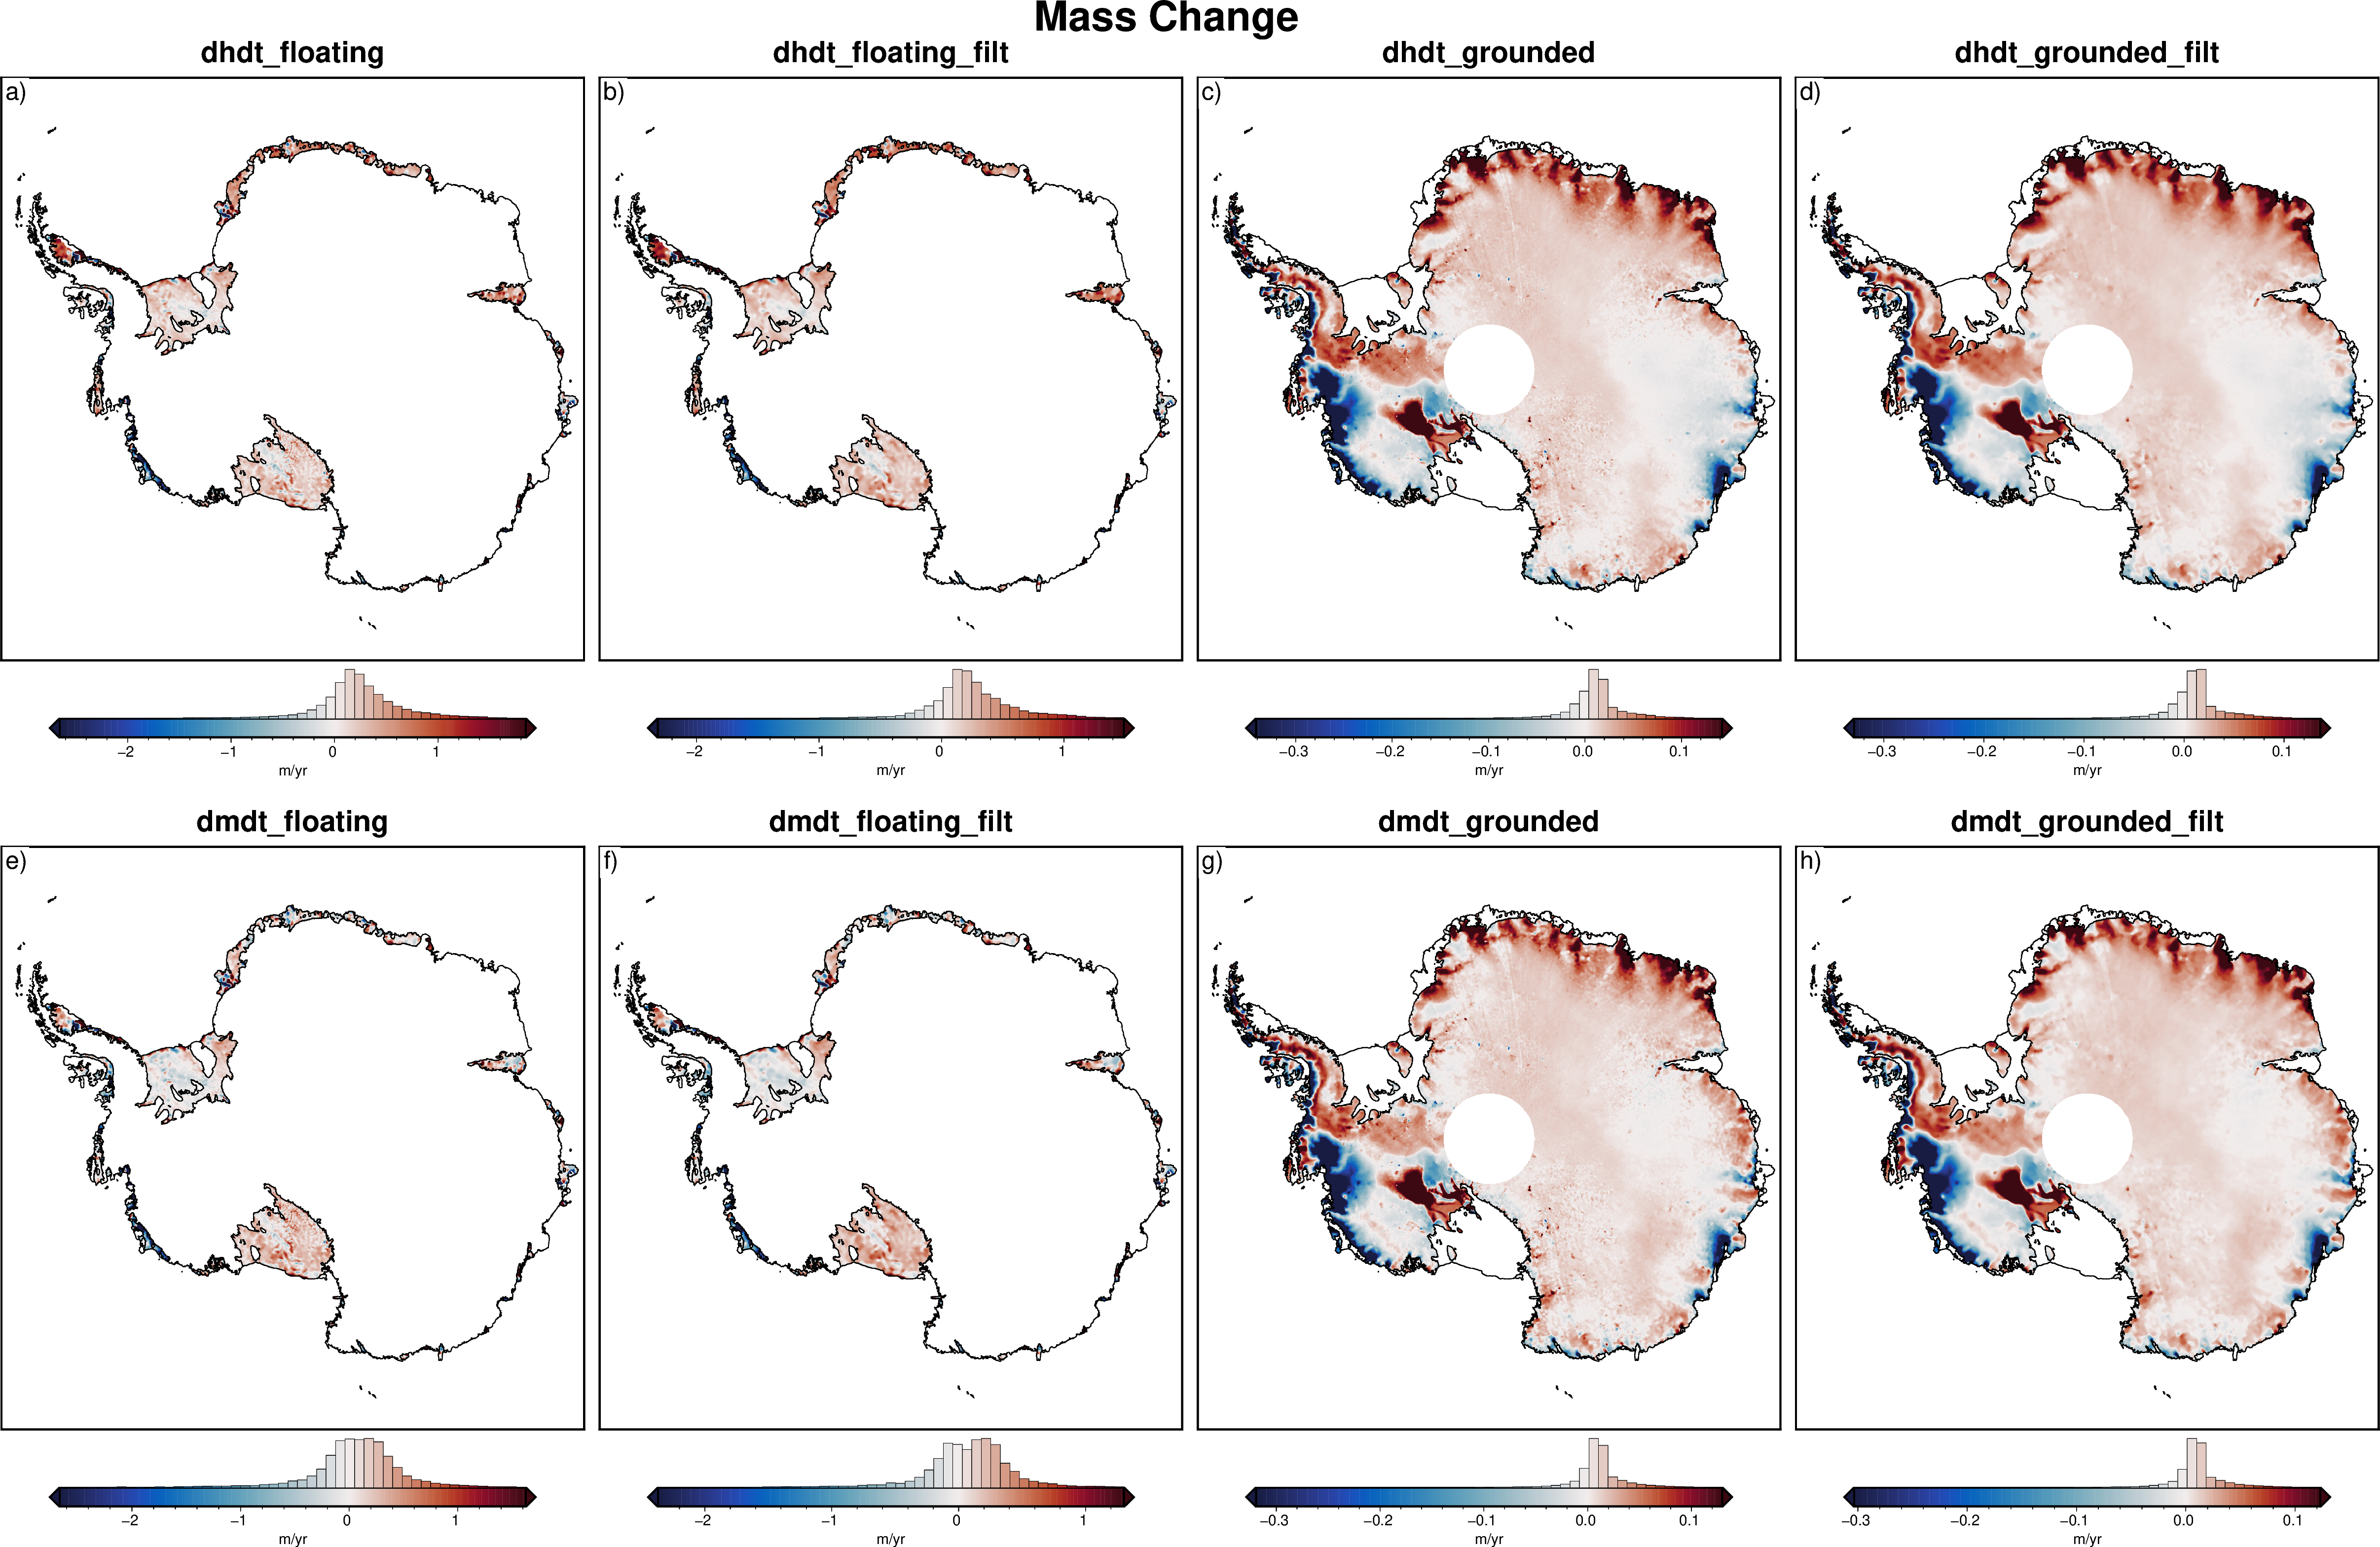

In [4]:
fig = maps.subplots(
    grids,
    region=regions.antarctica,
    # dims=(int(len(grids) / 2), 2),
    fig_title="Mass Change",
    titles=version_names,
    cbar_label="m/yr",
    margins=".5c/1.3c",
    coast=True,
    cmap="balance+h0",
    robust=True,
    hist=True,
)
fig.show(dpi=200)